In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import path
import glob

# Preamble

In [2]:
from matplotlib.font_manager import FontProperties

font_path = "../fonts/LinuxLibertine/LinBiolinum_Rah.ttf"
font = FontProperties(fname=font_path)
font.set_size(15)

tick_font = FontProperties(fname=font_path)
tick_font.set_size(14)

legend_font = FontProperties(fname=font_path)
legend_font.set_size(12) # 12, 10

import matplotlib.ticker as ticker
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))

In [3]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.set_theme(style="white")

In [4]:
# from skimage.metrics import peak_signal_noise_ratio as psnr
def sigma(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    nom = np.sum(abs(u_hat - u_ref)**2)
    denom = np.sum(abs(u_ref)**2)
    return nom / denom

def snr(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    signal = np.sum(abs(u_hat)**2)
    alpha = np.sum(u_hat * np.conjugate(u_ref)) / np.sum(abs(u_ref)**2)
    snr = signal / np.sum(abs(u_hat - alpha * u_ref)**2)
    return 10 * np.log10(snr)

def mse(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    h, w = u_ref.shape[-2:]
    mse = np.sum(abs(u_hat - u_ref)**2) / (h * w)
    return mse

def psnr(u_hat, u_ref):
    err = mse(u_hat, u_ref)
    return 10 * np.log10(1 / err)

def difference(u_hat, u_ref):
    u_hat /= abs(u_hat).max()
    u_ref /= abs(u_ref).max()
    return abs(u_hat - u_ref)

from skimage.metrics import structural_similarity as ssim

# Error Plot

In [5]:
s = 1.5
t_ASASM = [0.06, 0.07, 0.08, 0.12, 0.15]
t_BEASM1 = [0.17, 0.77, 1.89, 3.45, 5.36]
t_BEASM2 = [0.24, 0.25]

angles = [0, 5, 10, 15, 20]
err_ASASM = []
err_BEASM1 = []
err_BEASM2 = []

for theta in angles:

    u_GT = np.load(glob.glob(f'RS/RS*-{theta}-*.npy')[0])
    
    u_ASASM = np.load(glob.glob(f'results-errplot1/ASASM*-{theta}-{s:.2f}.npy')[0])
    err_ASASM.append(snr(u_ASASM, u_GT)) 

    if glob.glob(f'results-errplot1/BEASM*-{theta}-*.npy') != []:
        u_BEASM = np.load(glob.glob(f'results-errplot1/BEASM*-{theta}-*.npy')[0])
        err_BEASM1.append(snr(u_BEASM, u_GT))

    if glob.glob(f'results-errplot1/Case2/BEASM*-{theta}-{s:.3f}.npy') != []:
        u_BEASM = np.load(glob.glob(f'results-errplot1/Case2/BEASM*-{theta}-{s:.3f}.npy')[0])
        err_BEASM2.append(snr(u_BEASM, u_GT))


err_ASASM1 = np.array(err_ASASM)
err_BEASM1 = np.array(err_BEASM1)
err_BEASM2 = np.array(err_BEASM2)

<Figure size 640x480 with 0 Axes>

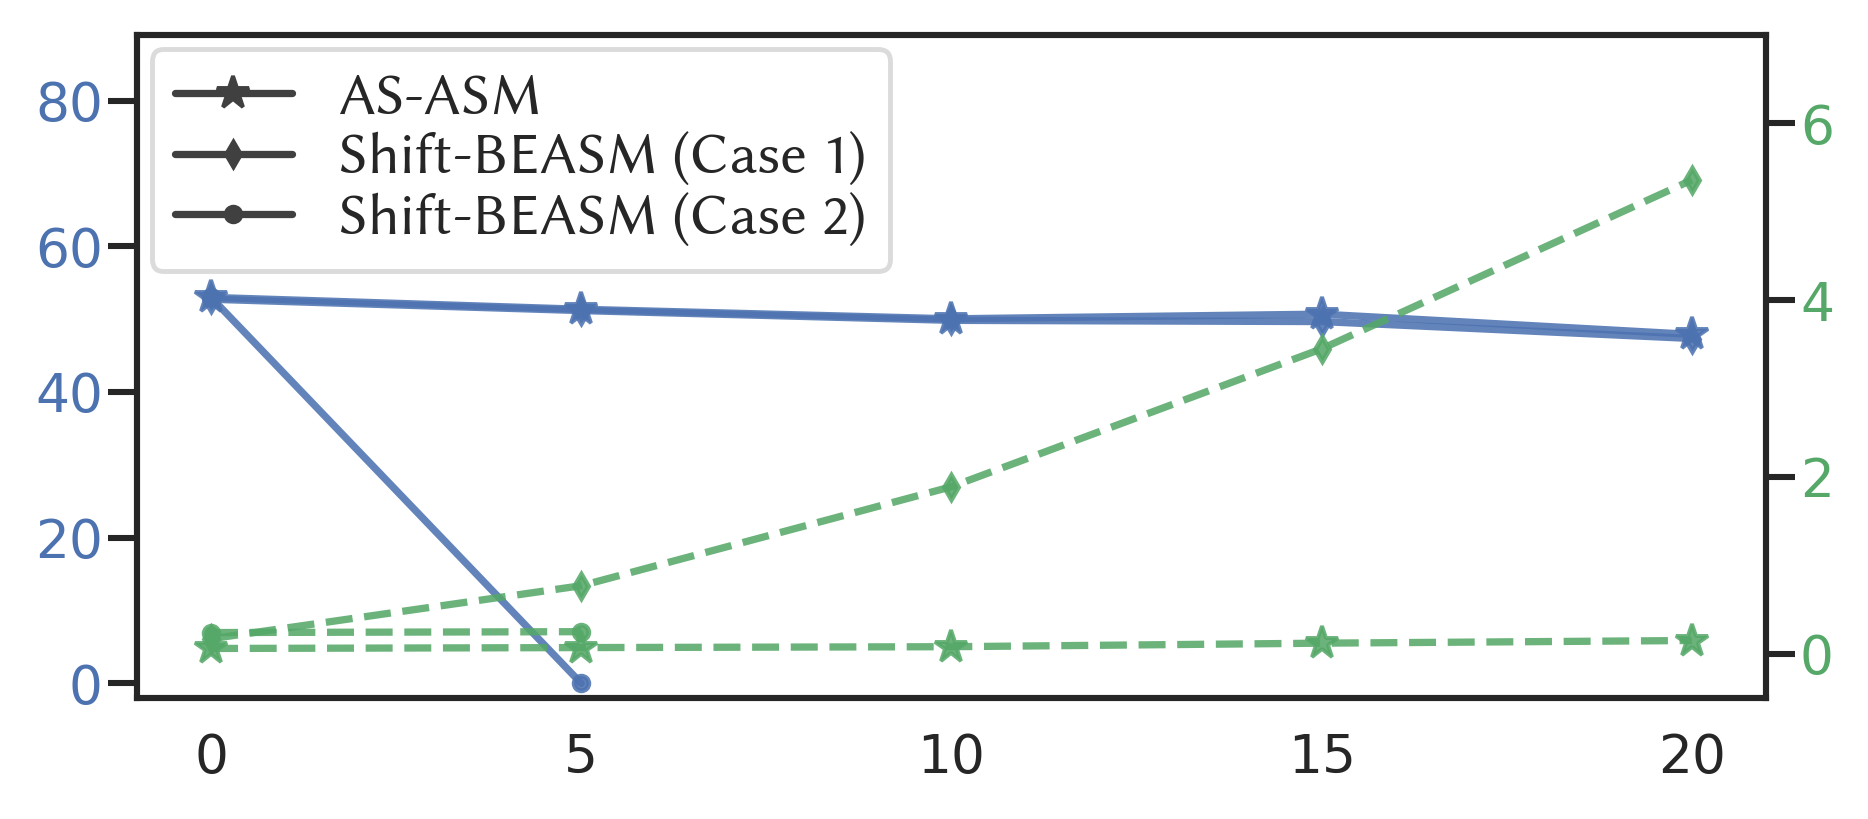

In [6]:
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# SNR curve
color1 = 'b'
ax1.plot(angles, err_ASASM[:len(angles)], color=color1, alpha=0.87, marker='*', ms=7, markeredgewidth=0.8)
ax1.plot(angles[:len(err_BEASM1)], err_BEASM1, color=color1, alpha=0.87, marker='d', ms=3.5)
ax1.plot(angles[:len(err_BEASM2)], err_BEASM2, color=color1, alpha=0.87, marker='.')
# plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font, labelpad=2)
# ax1.set_ylabel(fr'SNR (dB)', fontproperties=font, color=color1, labelpad=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(-2, 89)
ax1.tick_params(axis='both', which='major', pad=1)
plt.xticks(angles)

# Time
color2 = 'g'
ax2 = ax1.twinx()
ax2.plot(angles, t_ASASM[:len(angles)], color=color2, linestyle='dashed', alpha=0.87, marker='*', ms=7, markeredgewidth=0.8)
ax2.plot(angles[:len(err_BEASM1)], t_BEASM1[:len(angles)], color=color2, linestyle='dashed', alpha=0.87, marker='d', ms=3.5) #marker='x', markeredgewidth=1.2, ms=4
ax2.plot(angles[:len(err_BEASM2)], t_BEASM2[:len(angles)], color=color2, linestyle='dashed', alpha=0.87, marker='.')
ax2.tick_params(axis='y', labelcolor=color2)
# ax2.set_ylabel(fr'Time (sec)', fontproperties=font, color=color2, labelpad=2)
ax2.set_ylim(-.5, 7.)
ax2.tick_params(axis='both', which='major', pad=1)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='0.25', lw=1.5, marker='*', ms=7, markeredgewidth=0.8),
                Line2D([0], [0], color='0.25', lw=1.5, marker='d', ms=3.5),
                Line2D([0], [0], color='0.25', lw=1.5, marker='.')]
plt.legend(custom_lines, ['AS-ASM', 'Shift-BEASM (Case 1)', 'Shift-BEASM (Case 2)'], 
            prop=legend_font, loc='lower right', bbox_to_anchor=(0.48, 0.60), fancybox=True, framealpha=0.7, labelspacing = 0.1)

plt.margins(x=0, y=0)
fig.tight_layout()

# N Plot

In [7]:
angles = [0, 5, 10, 15, 20]

Ns_ASASM = [419, 419, 418, 417, 416]
Nf_ASASM = [1257, 1293, 1354, 1488, 1730]
Ns_BEASM1 = [405, 1086, 1829, 2563, 3274]
Nf_BEASM1 = [810, 2172, 3658, 5126, 6548]

<Figure size 640x480 with 0 Axes>

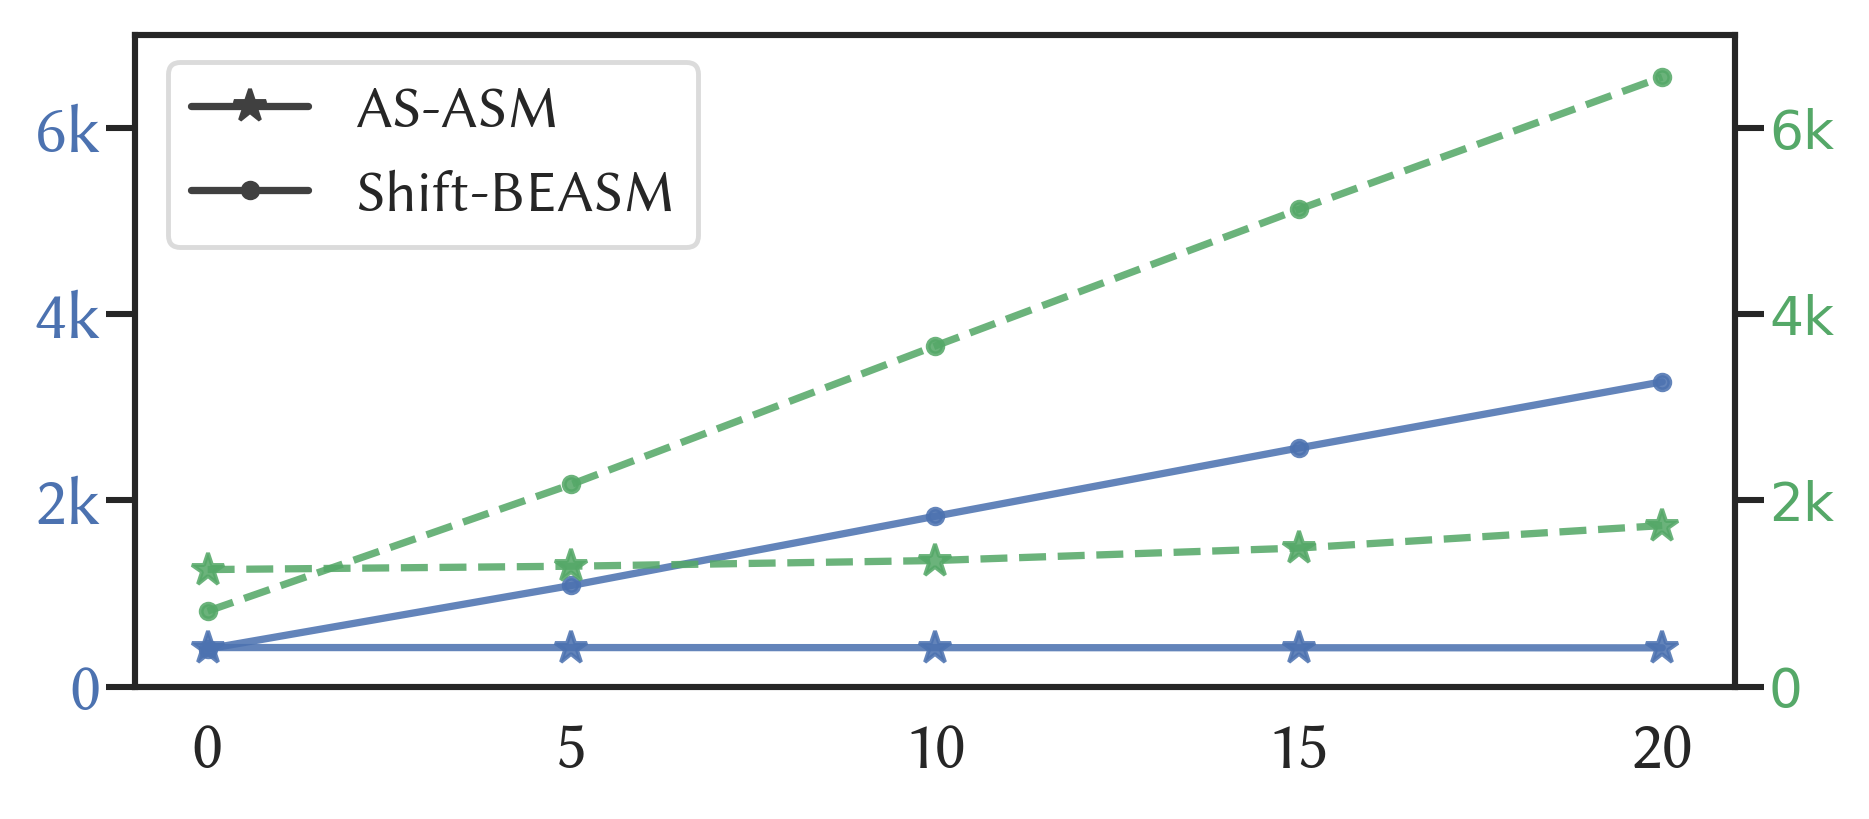

In [8]:
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))
# plt.subplots_adjust(right=1.5)

color1 = 'b'
ax1.plot(angles, Ns_ASASM, label='AS-ASM (Spatial)', color=color1, alpha=0.87, marker='*', ms=7, markeredgewidth=0.8)
ax1.plot(angles, Ns_BEASM1, label='Shift-BEASM (Spatial)', marker='.', color=color1, alpha=0.87)
ax1.set_ylim(0, 7000)
plt.xticks(angles)

# plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font, labelpad=2)
# ax1.set_ylabel(fr'# spat. sampling', fontproperties=font, color=color1, labelpad=2)
ax1.tick_params(axis='y', labelcolor=color1)
plt.xticks(fontproperties=tick_font)
plt.yticks(fontproperties=tick_font)
ax1.tick_params(axis='both', which='major', pad=1)
labels = ['0', '2k', '4k', '6k', '8k']
ax1.set_yticklabels(labels)

color2 = 'g'
ax2 = ax1.twinx()
ax2.plot(angles, Nf_ASASM, label='AS-ASM (Frequency)', color=color2, alpha=0.87, marker='*', ms=7, markeredgewidth=0.8, linestyle='dashed')
ax2.plot(angles, Nf_BEASM1, label='Shift-BEASM (Frequency)', marker='.', color=color2, alpha=0.87, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color2)
# ax2.set_ylabel(fr'# freq. sampling', fontproperties=font, color=color2, labelpad=2)
ax2.set_ylim(0, 7000)
ax2.tick_params(axis='both', which='major', pad=1)
ax2.set_yticklabels(labels)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='0.25', lw=1.5, marker='*', ms=7, markeredgewidth=0.8),
                Line2D([0], [0], color='0.25', lw=1.5, marker='.')]
plt.legend(custom_lines, ['AS-ASM', 'Shift-BEASM'], 
            prop=legend_font, loc='lower right', bbox_to_anchor=(0.37, 0.63), fancybox=True, framealpha=0.7)

# plt.margins(x=0, y=0)
fig.tight_layout()

In [9]:
# from matplotlib.ticker import FormatStrFormatter
# plt.clf()
# fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
# # ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# # SNR curve
# color1 = 'b'
# ax1.plot(angles, err_ASASM[:len(angles)], label='AS-ASM', marker='x', color=color1)
# ax1.plot(angles[:len(err_BEASM2)], err_BEASM2, marker='.', label='Shift-BEASM', color=color1)
# plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font, labelpad=2)
# ax1.set_ylabel(fr'SNR (dB)', fontproperties=font, color=color1, labelpad=2)
# ax1.tick_params(axis='y', labelcolor=color1)
# # plt.xticks(fontproperties=tick_font)
# # plt.yticks(fontproperties=tick_font)
# ax1.set_ylim(-5, 85)
# ax1.tick_params(axis='both', which='major', pad=1)

# # Time
# color2 = 'g'
# ax2 = ax1.twinx()
# ax2.plot(angles, t_ASASM[:len(angles)], marker='x', label='AS-ASM', color=color2, linestyle='dashed')
# # ax2.plot(angles[:len(err_BEASM1)], t_BEASM1[:len(angles)], marker='.', label='Shift-BEASM', color=color2, linestyle='dashed')
# ax2.plot(angles[:len(err_BEASM2)], t_BEASM2[:len(angles)], marker='.', label='Shift-BEASM', color=color2, linestyle='dashed')
# ax2.tick_params(axis='y', labelcolor=color2)
# ax2.set_ylabel(fr'Time (sec)', fontproperties=font, color=color2, labelpad=2)
# ax2.set_ylim(0., 1.)
# ax2.tick_params(axis='both', which='major', pad=1)

# from matplotlib.lines import Line2D
# custom_lines = [Line2D([0], [0], color='0.25', lw=1.5, marker='x'),
#                 Line2D([0], [0], color='0.25', lw=1.5, marker='.')]
# plt.legend(custom_lines, ['AS-ASM', 'Shift-BEASM'], prop=legend_font, loc='lower right', bbox_to_anchor=(0.51, 0.53), fancybox=True, framealpha=0.7, labelspacing = 0.2)

# plt.margins(x=0, y=0)
# fig.tight_layout()

In [10]:
# from matplotlib.ticker import FormatStrFormatter
# plt.clf()
# fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
# # ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# # SNR curve
# color1 = 'b'
# ax1.plot(angles, err_ASASM[:len(angles)],  marker='x', color=color1)
# ax1.plot(angles[:len(err_BEASM1)], err_BEASM1[:len(angles)], marker='.', color=color1)
# plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font, labelpad=2)
# ax1.set_ylabel(fr'SNR (dB)', fontproperties=font, color=color1, labelpad=2)
# ax1.tick_params(axis='y', labelcolor=color1)
# # plt.xticks(fontproperties=tick_font)
# # plt.yticks(fontproperties=tick_font)
# ax1.set_ylim(35, 70)
# ax1.tick_params(axis='both', which='major', pad=1)


# # Time
# color2 = 'g'
# ax2 = ax1.twinx()
# ax2.plot(angles, t_ASASM[:len(angles)], marker='x', color=color2, linestyle='dashed')
# ax2.plot(angles[:len(err_BEASM1)], t_BEASM1[:len(angles)], marker='.', color=color2, linestyle='dashed')
# # ax2.plot(angles[:len(err_BEASM2)], t_BEASM2[:len(angles)], marker='.', label='Shift-BEASM', color=color2)
# ax2.tick_params(axis='y', labelcolor=color2)
# ax2.set_ylabel(fr'Time (sec)', fontproperties=font, color=color2, labelpad=2)
# ax2.set_ylim(-0.5, 6)
# ax2.tick_params(axis='both', which='major', pad=1)
# ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))


# from matplotlib.lines import Line2D
# custom_lines = [Line2D([0], [0], color='0.25', lw=1.5, marker='x'),
#                 Line2D([0], [0], color='0.25', lw=1.5, marker='.')]
# plt.legend(custom_lines, ['AS-ASM', 'Shift-BEASM'], prop=legend_font, loc='lower right', bbox_to_anchor=(0.51, 0.53), fancybox=True, framealpha=0.7, labelspacing = 0.2)

# plt.margins(x=0, y=0)
# fig.tight_layout()

# Expansion $s$ v.s. Error

In [14]:
slist = [1, 1.5, 2.0, 2.5, 3., 3.5]

theta1 = 5
time1 = [0.02, 0.08, 0.25, 0.69, 1.20, 2.24]

theta2 = 10
time2 = [0.02, 0.08, 0.27, 0.67, 1.48, 2.74]

theta3 = 15
time3 = [0.02, 0.11, 0.34, 0.91, 1.86, 3.97]

theta4 = 20
time4 = [0.03, 0.12, 0.48, 1.43, 3.07, 6.48]

In [17]:
err_ASASM1 = []
im_GT = np.load(glob.glob(f'RS/RS*-{theta1}-*.npy')[0])
for s in slist:
    im_ASASM = np.load(glob.glob(f'results-s/ASASM*-{theta1}-{s:.2f}.npy')[0])
    err_ASASM1.append(snr(im_ASASM, im_GT))  
err_ASASM1 = np.array(err_ASASM1)

err_ASASM2 = []
im_GT = np.load(glob.glob(f'RS/RS*-{theta2}-*.npy')[0])
for s in slist:
    im_ASASM = np.load(glob.glob(f'results-s/ASASM*-{theta2}-{s:.2f}.npy')[0])
    err_ASASM2.append(snr(im_ASASM, im_GT))  
err_ASASM2 = np.array(err_ASASM2)

err_ASASM3 = []
im_GT = np.load(glob.glob(f'RS/RS*-{theta3}-*.npy')[0])
for s in slist:
    im_ASASM = np.load(glob.glob(f'results-s/ASASM*-{theta3}-{s:.2f}.npy')[0])
    err_ASASM3.append(snr(im_ASASM, im_GT))  
err_ASASM3 = np.array(err_ASASM3)

err_ASASM4 = []
im_GT = np.load(glob.glob(f'RS/RS*-{theta4}-*.npy')[0])
for s in slist:
    im_ASASM = np.load(glob.glob(f'results-s/ASASM*-{theta4}-{s:.2f}.npy')[0])
    err_ASASM4.append(snr(im_ASASM, im_GT))  
err_ASASM4 = np.array(err_ASASM4)

<Figure size 640x480 with 0 Axes>

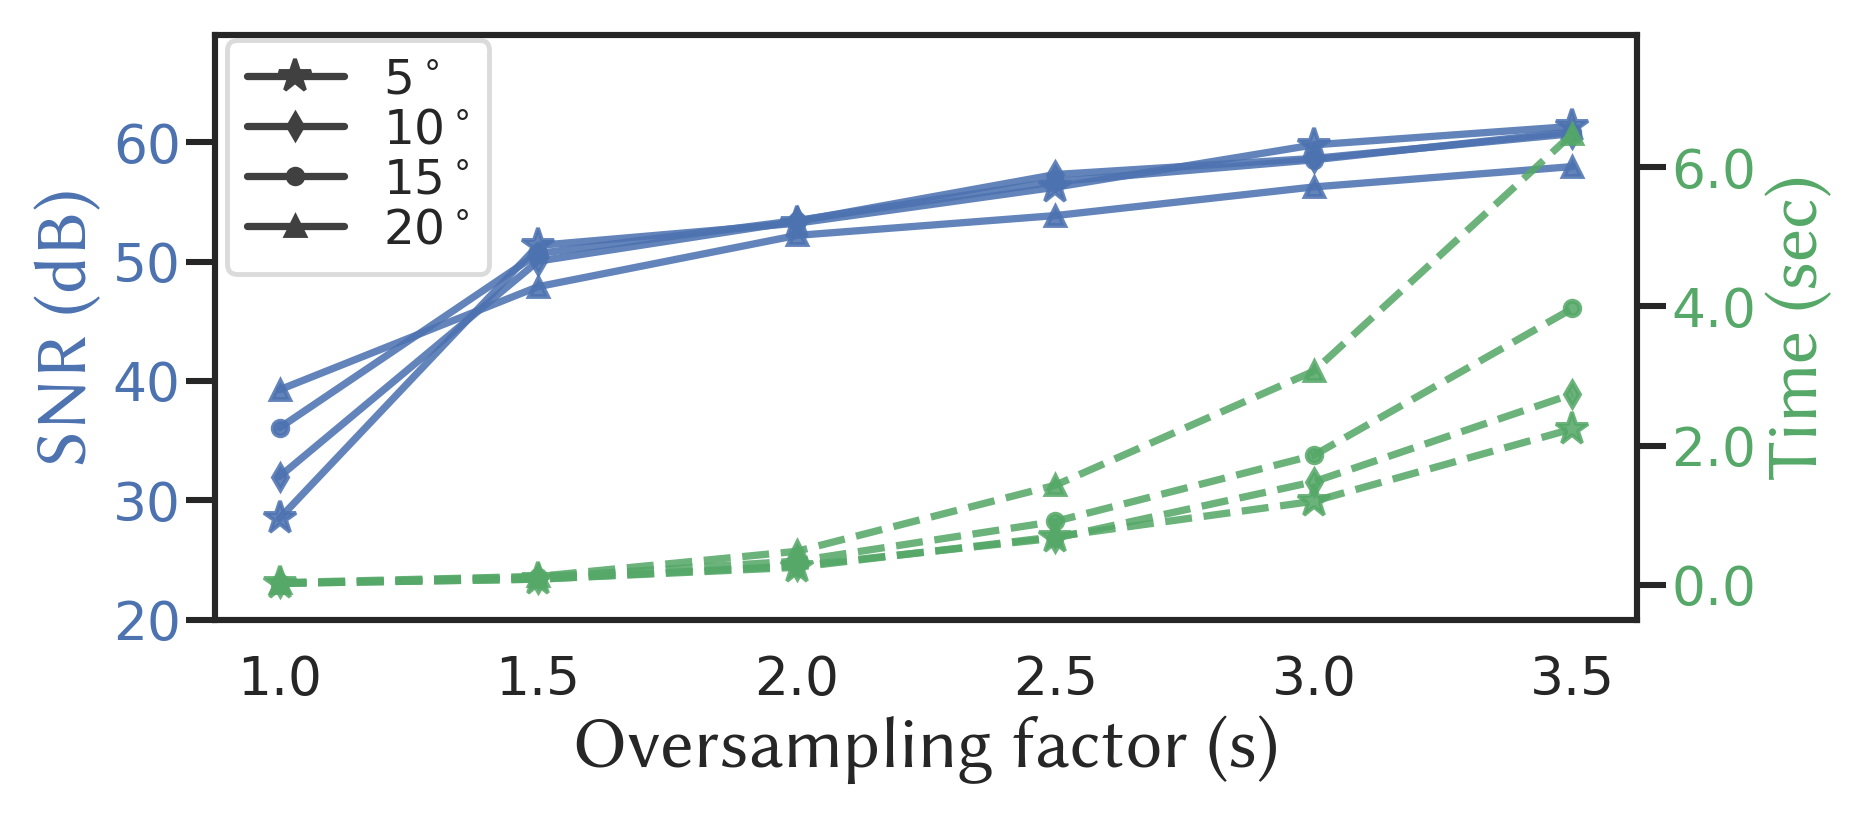

In [18]:
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# SNR curve
color1 = 'b'
ax1.plot(slist, err_ASASM1, color=color1, alpha=0.87, marker='*', ms=7, markeredgewidth=0.8)
ax1.plot(slist, err_ASASM2, color=color1, alpha=0.87, marker='d', ms=3.5)
ax1.plot(slist, err_ASASM3, color=color1, alpha=0.87, marker='.')
ax1.plot(slist, err_ASASM4, color=color1, alpha=0.87, marker='^', ms=3.5)
plt.xlabel(fr'Oversampling factor (s)', fontproperties=font, labelpad=2)
ax1.set_ylabel(fr'SNR (dB)', fontproperties=font, color=color1, labelpad=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(20, 69)
ax1.tick_params(axis='both', which='major', pad=1)


# Time
color2 = 'g'
ax2 = ax1.twinx()
ax2.plot(slist, time1, color=color2, linestyle='dashed', alpha=0.87, marker='*', ms=7, markeredgewidth=0.8)
ax2.plot(slist, time2, color=color2, linestyle='dashed', alpha=0.87, marker='d', ms=3.5) #marker='x', markeredgewidth=1.2, ms=4
ax2.plot(slist, time3, color=color2, linestyle='dashed', alpha=0.87, marker='.')
ax2.plot(slist, time4, color=color2, linestyle='dashed', alpha=0.87, marker='^', ms=3.5)

ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel(fr'Time (sec)', fontproperties=font, color=color2, labelpad=2)
ax2.set_ylim(-0.5, 7.9)
ax2.tick_params(axis='both', which='major', pad=1)
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='0.25', lw=1.5, marker='*', ms=7, markeredgewidth=0.8),
                Line2D([0], [0], color='0.25', lw=1.5, marker='d', ms=3.5),
                Line2D([0], [0], color='0.25', lw=1.5, marker='.'),
                Line2D([0], [0], color='0.25', lw=1.5, marker='^', ms=3.5)]
legend_font.set_size(10) # 12, 10
plt.legend(custom_lines, ['$5^\circ$', '$10^\circ$', '$15^\circ$', '$20^\circ$'], 
            prop=legend_font, loc='lower right', bbox_to_anchor=(0.21, 0.55), fancybox=True, framealpha=0.7, labelspacing = 0.1)

plt.margins(x=0, y=0)
fig.tight_layout()

# Results

In [ ]:
# Colormap conversion
from utils import save_image
import re
theta = 0
exps = 2.5
read_path = glob.glob(f'results-errplot2/ASASM*-{theta}-*.npy')[0]
folders = re.split('/|.npy', read_path)
# im = np.array(Image.open(read_path))
u = np.load(read_path)
im_abs = abs(u)
im_abs = abs(u)
save_image(im_abs, f'{folders[0]}/visual/{folders[1]}', cmap='gray') # viridis
save_image(im_abs, f'{folders[0]}/visual/{folders[1]}', cmap='twilight') # viridis

In [ ]:
# colorbar
import pylab as pl
a = np.array([[0,1]])
pl.figure(figsize=(0.1, 1), dpi=350)
img = pl.imshow(a, cmap="twilight")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical", cax=cax, ticks=[0, 1])
cbar.ax.set_yticklabels([])
cbar.ax.tick_params(labelsize=10, size=0)
pl.savefig("colorbar.png")

In [ ]:
# from matplotlib.ticker import FormatStrFormatter
# plt.clf()
# fig, ax = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)

# # Error curve
# plt.plot(angles, err_BEASM, label='Shift-BEASM', marker='x')
# plt.plot(angles, err_ASASM, label='AS-ASM', marker='*')
# plt.legend(prop=tick_font, loc='lower right', bbox_to_anchor=(0.47, 0.45))
# plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font)
# plt.ylabel(fr'SNR', fontproperties=font)
# plt.xticks(fontproperties=tick_font)
# plt.yticks(fontproperties=tick_font)
# # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))

# # zoom in
# # from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

# # axins_dummy = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.18, 0.6), bbox_transform=ax.figure.transFigure)
# # axins_dummy.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False )
# # axins_dummy.set_xlim(4.5, 10.6)
# # axins_dummy.set_ylim(-0.07, 0.1)

# # axins = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.18, 0.6), bbox_transform=ax.figure.transFigure)
# # axins.plot(angles, err_BEASM, label='Shift-BEASM', marker='x')
# # axins.plot(angles, err_ASASM, label='AS-ASM', marker='*')
# # axins.set_xlim(4.5, 10.6)
# # axins.set_ylim(-0.0005, 0.0046)
# # axins.get_xaxis().set_visible(False)
# # axins.get_yaxis().set_visible(False)
# # axins.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
# # # axins.yaxis.set_ticks(np.linspace(0.001, 0.004, 3))
# # axins.tick_params(axis='both', which='major', labelsize=10)
# # for axis in ['top','bottom','left','right']:
# #     axins.spines[axis].set_linewidth(1.2)
# #     axins.spines[axis].set_color("gray")
# # mark_inset(ax, axins_dummy, loc1=3, loc2=4, fc="none", ec="0.5")

# # Sampling
# # ax2 = ax.twinx()
# # color2 = 'g'
# # ax2.tick_params(axis='y', labelcolor=color2)
# # ax2.set_yticks(np.linspace(1000,5000,5))
# # l2 = ax2.plot(angles, Nf, marker='.', color=color2)
# # ax2.set_ylabel(fr'Error ($\sigma$)', fontproperties=font)

# fig.tight_layout()
# # plt.savefig('results-errplot/figure.pdf')